In [13]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_Model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

In [12]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

1/1 [==============================] - 1s 1s/step
Image: rock1.jpg
Class: Rock

Confidence Score: 0.9999992847442627



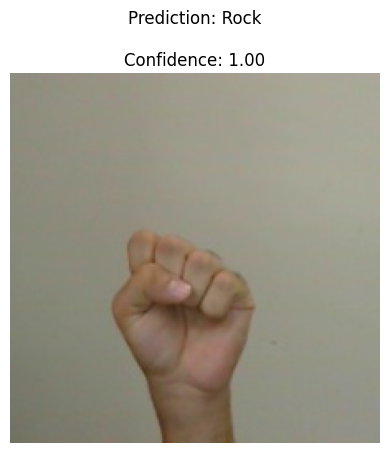

1/1 [==============================] - 0s 34ms/step
Image: rock2.jpg
Class: Rock

Confidence Score: 0.9999986886978149



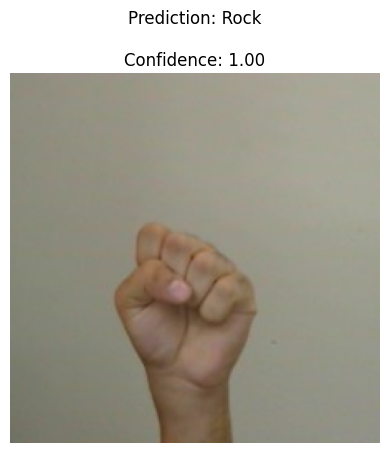

1/1 [==============================] - 0s 38ms/step
Image: rock3.jpg
Class: Rock

Confidence Score: 0.9999940395355225



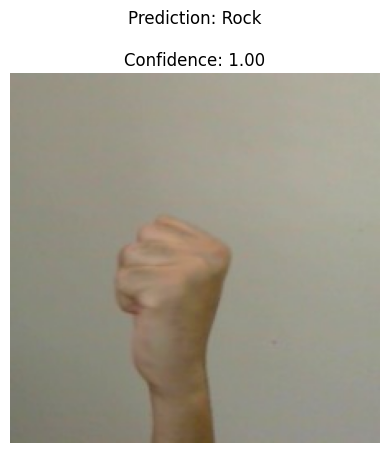

1/1 [==============================] - 0s 37ms/step
Image: paper1.jpg
Class: Paper

Confidence Score: 0.9999996423721313



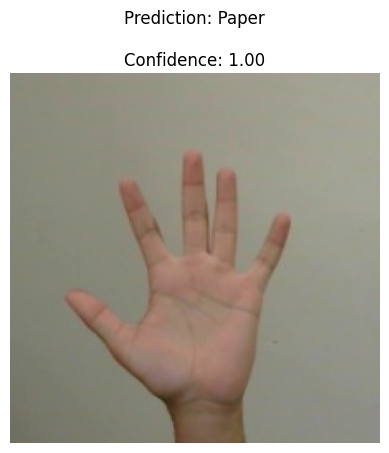

1/1 [==============================] - 0s 36ms/step
Image: paper2.jpg
Class: Paper

Confidence Score: 0.9999996423721313



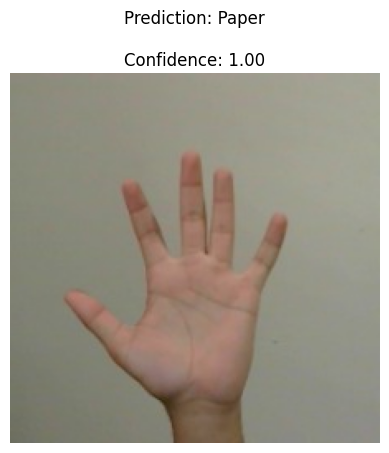

1/1 [==============================] - 0s 35ms/step
Image: paper3.jpg
Class: Paper

Confidence Score: 0.9999998807907104



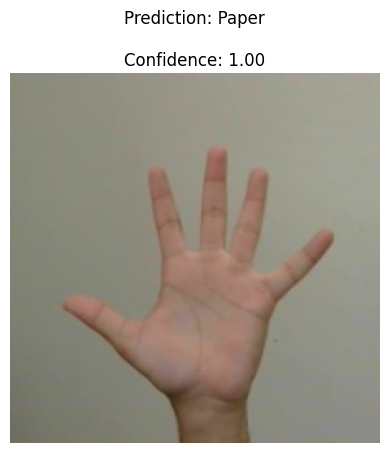

1/1 [==============================] - 0s 53ms/step
Image: scissor1.jpg
Class: Scissor

Confidence Score: 0.9999998807907104



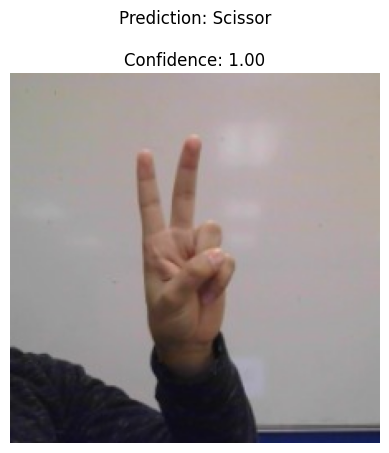

1/1 [==============================] - 0s 34ms/step
Image: scissor2.jpg
Class: Scissor

Confidence Score: 0.9999991655349731



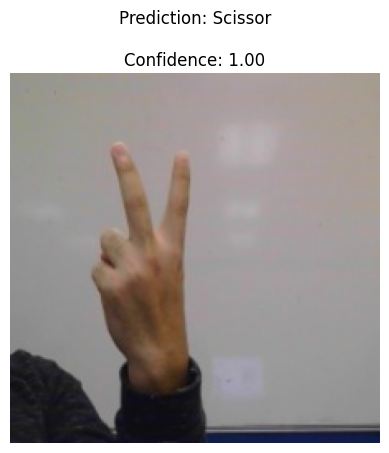

In [15]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib for displaying the image

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_Model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# List of image filenames
image_filenames = [
    "rock1.jpg", "rock2.jpg", "rock3.jpg",
    "paper1.jpg", "paper2.jpg", "paper3.jpg",
    "scissor1.jpg", "scissor2.jpg"
]

# Create the array of the right shape to feed into the keras model
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Loop through each image in the list
for image_file in image_filenames:
    # Replace this with the path to your image
    image = Image.open(image_file).convert("RGB")

    # resizing the image to be at least 224x224 and then cropping from the center
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

    # turn the image into a numpy array
    image_array = np.asarray(image)

    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    # Load the image into the array
    data[0] = normalized_image_array

    # Predicts the model
    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    # Print prediction and confidence score
    print(f"Image: {image_file}")
    print(f"Class: {class_name[2:]}")
    print(f"Confidence Score: {confidence_score}\n")

    # Display the image along with the prediction and confidence score
    plt.imshow(image)
    plt.title(f"Prediction: {class_name[2:]} \nConfidence: {confidence_score:.2f}")
    plt.axis('off')  # Hide the axes for a cleaner look
    plt.show()
